# Face & Text Extraction

Construa um algoritmo para comparar 2 faces afim de determinar se elas são iguais. Para ambas as faces garanta que nenhuma das condições abaixo seja permitido em nenhuma das faces de comparação:



In [ ]:
# Instalação da biblioteca Boto3, sempre obter a última versão
!pip install boto3

In [6]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from PIL import Image, ImageDraw

In [ ]:
ACCESS_ID  = "ACCESS-ID"
ACCESS_KEY = "ACCESS-KEY"
region     = "us-east-1"

In [8]:
# Limpeza do

!rm -rf fiap_8DTSR_cognitive_environments/

In [11]:
!git clone https://github.com/escardoso/fiap_8DTSR_cognitive_environments.git

Cloning into 'fiap_8DTSR_cognitive_environments'...
fatal: could not read Username for 'https://github.com': No such device or address


In [10]:
imagem = Image.open("imagens/cnh_image_1.jpg")
imagem

FileNotFoundError: [Errno 2] No such file or directory: 'imagens/cnh_image_1.jpg'

In [ ]:
# nome do arquivo
file_name = "imagens/tom-cruise-closed-eyes.jpg"

# conversão para binário
with open(file_name, "rb") as file:
  img_file = file.read()
  bytes_file = bytearray(img_file)

# abrindo a sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criando o cliente
client = session.client("rekognition", region_name=region)

# criando a requisição
response = client.detect_faces(
    Image={'Bytes': bytes_file},
    Attributes=["ALL"]
)

In [ ]:
def get_face_details(file_name):
  # conversão para binário
  with open(file_name, "rb") as file:
    img_file = file.read()
    bytes_file = bytearray(img_file)

  # abrindo a sessão
  session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

  # criando o cliente
  client = session.client("rekognition", region_name=region)

  # criando a requisição
  response = client.detect_faces(
      Image={'Bytes': bytes_file},
      Attributes=["EYES_OPEN", "FACE_OCCLUDED", "SUNGLASSES"]
  )

  return response

In [ ]:
response

In [ ]:
response["FaceDetails"][0]["EyesOpen"]


In [ ]:
response["FaceDetails"][0]["Sunglasses"]

{'Value': False, 'Confidence': 99.99673461914062}

In [ ]:
response["FaceDetails"][0]["FaceOccluded"]

{'Value': False, 'Confidence': 99.85398864746094}

In [ ]:
def verificacao_face(face_details):
  if len(face_details["FaceDetails"]) > 1:
    print("Imagem com 2 faces.")
    return None
  face = face_details["FaceDetails"][0]
  eyes_open = face["EyesOpen"]
  sunglasses = face["Sunglasses"]
  occlusion = face["FaceOccluded"]
  if eyes_open["Value"] == False:
    print("Face com olhos fechados, confiança " + str(eyes_open["Confidence"]) + "%.")
  if sunglasses["Value"] == True:
    print("Face com óculos escuros, confiança " + str(sunglasses["Confidence"]) + "%.")
  if occlusion["Value"] == True:
    print("Face com oclusão, confiança " + str(occlusion["Confidence"]) + "%.")
  if eyes_open["Value"] == True and sunglasses["Value"] == False and occlusion["Value"] == False:
    print("Face sem problemas para processar")

In [ ]:
verificacao_face(response)

Face com olhos fechados, confiança 52.076072692871094%.


Face com olhos fechados, confiança 52.076072692871094%.


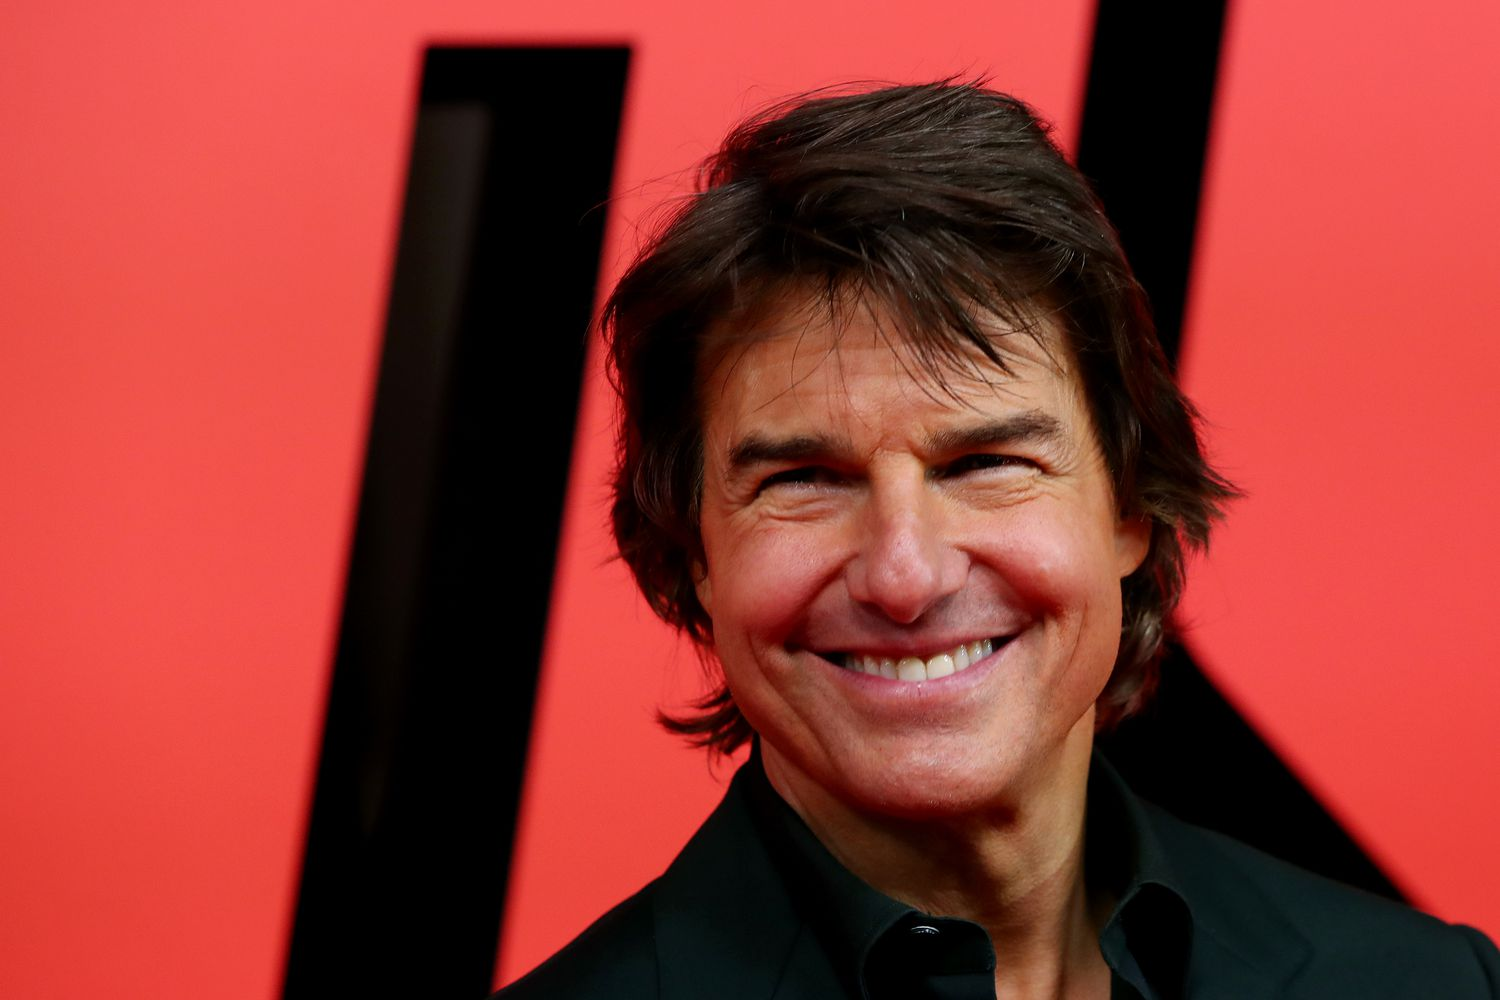

In [ ]:
file_path = "imagens/tom-cruise-closed-eyes.jpg"
face_details = get_face_details(file_path)
verificacao_face(face_details)
imagem = Image.open(file_path)
imagem

Face com oclusão, confiança 85.25176239013672%.


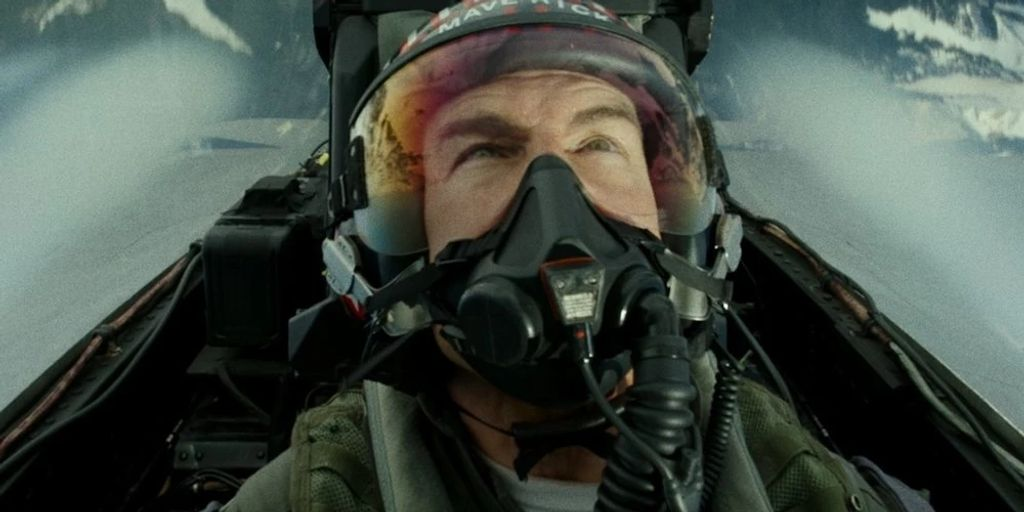

In [ ]:
file_path = "imagens/tom-cruise-occlusion.png"
face_details = get_face_details(file_path)
verificacao_face(face_details)
imagem = Image.open(file_path)
imagem

Face com óculos escuros, confiança 99.68962860107422%.
Face com oclusão, confiança 99.99376678466797%.


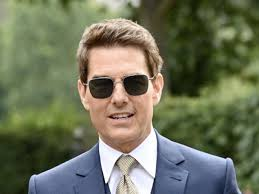

In [ ]:
file_path = "imagens/tom-cruise-sunglasses.jpg"
face_details = get_face_details(file_path)
verificacao_face(face_details)
imagem = Image.open(file_path)
imagem

Imagem com 2 faces.


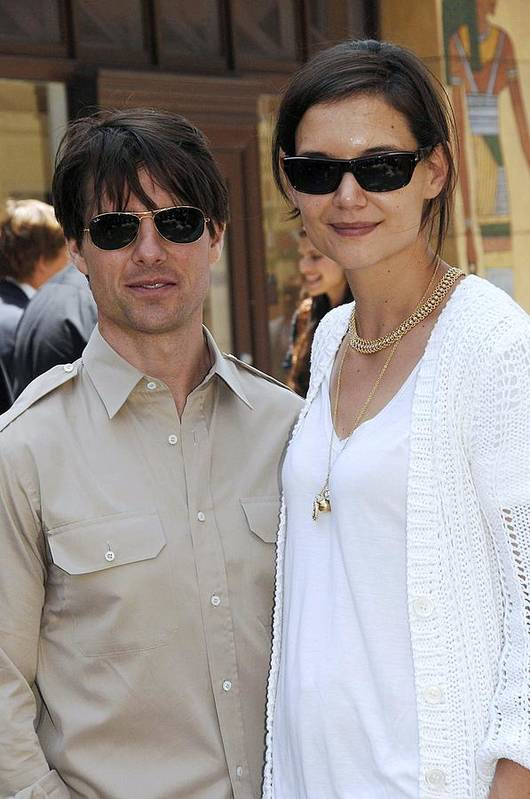

In [ ]:
file_path = "imagens/tom-cruise-2-people.jpg"
face_details = get_face_details(file_path)
verificacao_face(face_details)
imagem = Image.open(file_path)
imagem

Face sem problemas para processar


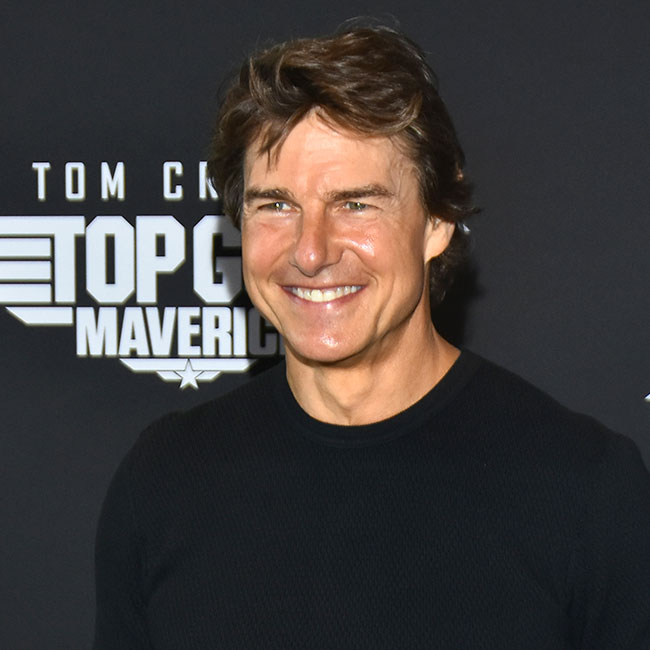

In [ ]:
file_path = "imagens/tom-cruise-1.jpg"
face_details = get_face_details(file_path)
verificacao_face(face_details)
imagem = Image.open(file_path)
imagem

Face sem problemas para processar


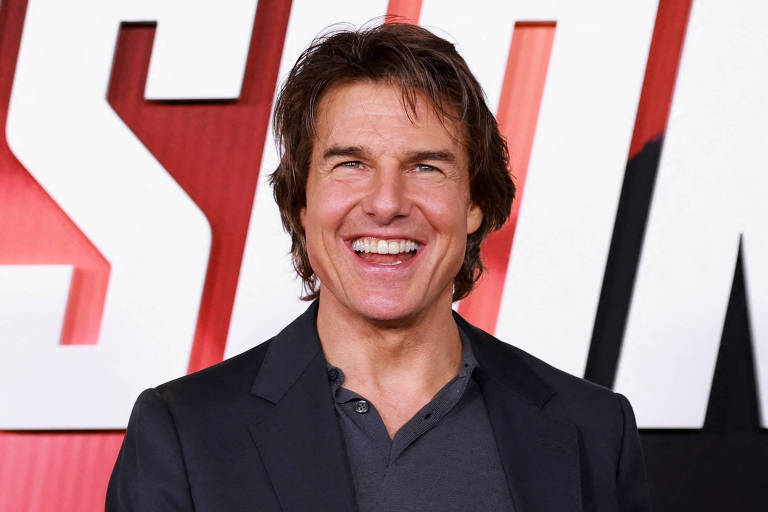

In [ ]:
file_path = "imagens/tom-cruise-2.jpg"
face_details = get_face_details(file_path)
verificacao_face(face_details)
imagem = Image.open(file_path)
imagem

In [ ]:
# imagem de comparação 1 (origem)
file_name_source = "imagens/tom-cruise-1.jpg"

# imagem de comparação 2 (alvo)
file_name_target = "imagens/tom-cruise-2.jpg"

# convertendo a imagem de origem no formato binário
with open(file_name_source, "rb") as file:
  img_file = file.read()
  bytes_file_source = bytearray(img_file)

# convertendo a imagem alvo no formato binário
with open(file_name_target, "rb") as file:
  img_file = file.read()
  bytes_file_target = bytearray(img_file)

# abrindo a sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criando o cliente
client = session.client("rekognition", region_name=region)

# realizando a requisição
response = client.compare_faces(
    SourceImage={'Bytes': bytes_file_source},
    TargetImage={'Bytes': bytes_file_target},
)

In [ ]:
response

{'SourceImageFace': {'BoundingBox': {'Width': 0.2823902368545532,
   'Height': 0.3734133243560791,
   'Left': 0.3723376393318176,
   'Top': 0.17630769312381744},
  'Confidence': 99.99870300292969},
 'FaceMatches': [{'Similarity': 99.99909973144531,
   'Face': {'BoundingBox': {'Width': 0.21921908855438232,
     'Height': 0.459481418132782,
     'Left': 0.39702609181404114,
     'Top': 0.16736984252929688},
    'Confidence': 99.99957275390625,
    'Landmarks': [{'Type': 'eyeLeft',
      'X': 0.4558055102825165,
      'Y': 0.32461464405059814},
     {'Type': 'eyeRight', 'X': 0.5539187788963318, 'Y': 0.3309805393218994},
     {'Type': 'mouthLeft', 'X': 0.4597553312778473, 'Y': 0.4785703122615814},
     {'Type': 'mouthRight', 'X': 0.5416693687438965, 'Y': 0.48399412631988525},
     {'Type': 'nose', 'X': 0.5028138160705566, 'Y': 0.4017588496208191}],
    'Pose': {'Roll': 1.4602535963058472,
     'Yaw': -0.6464588046073914,
     'Pitch': 9.44393539428711},
    'Quality': {'Brightness': 81.766

In [ ]:
response["FaceMatches"][0]["Similarity"]

99.99909973144531